In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

In [3]:
x = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2_regression/data/0_y.csv",
                header=None)

In [4]:
x.shape, y.shape

((387, 5), (387, 1))

In [5]:
binary = LinearRegression()

In [6]:
binary.fit(x[[1]], y)

LinearRegression()

In [7]:
binary.coef_

array([[95.52010745]])

In [8]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

In [9]:
binary.fit(x[[1]], y)

LinearRegression()

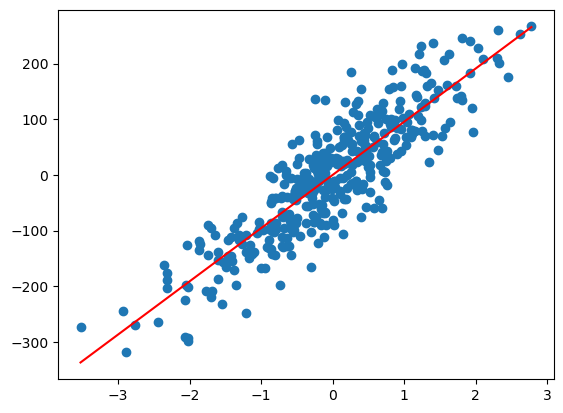

In [10]:
plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')

In [11]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

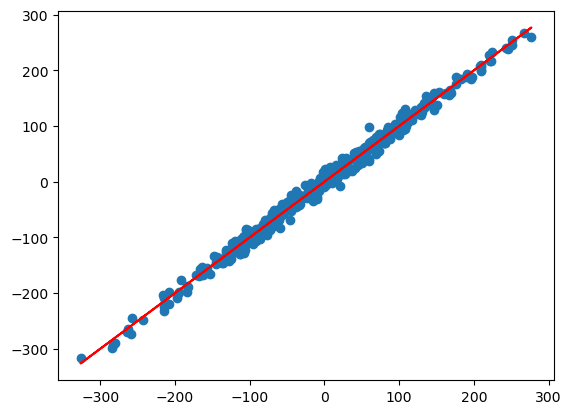

In [12]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

### 1. Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

In [13]:
x, x.shape

(            0         1         2         3         4
 0    0.071841  0.855352 -0.305597  0.028253  1.826895
 1    0.139521 -0.423507  0.461059 -0.447400 -0.034988
 2    1.626311 -0.257622 -0.697520  1.413219  1.086292
 3   -1.183233 -0.826343  0.073047 -0.639690 -0.503273
 4   -0.783365 -0.861232  0.951448 -0.117306  0.680597
 ..        ...       ...       ...       ...       ...
 382  0.684004  2.320728  0.380965 -1.050408 -0.151801
 383 -0.430455  2.097191  0.379874  0.135858 -1.400176
 384 -0.457141  0.940791 -0.660270  2.325658 -1.510055
 385 -0.344278 -1.209805 -2.119721 -1.485907 -0.167689
 386 -1.349114  0.715605  1.273045 -0.782789  0.683719
 
 [387 rows x 5 columns],
 (387, 5))

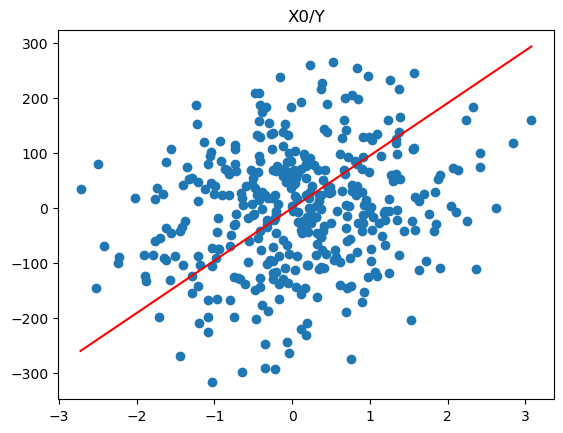

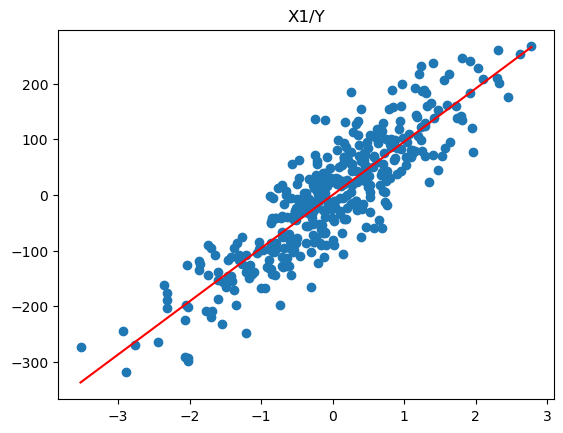

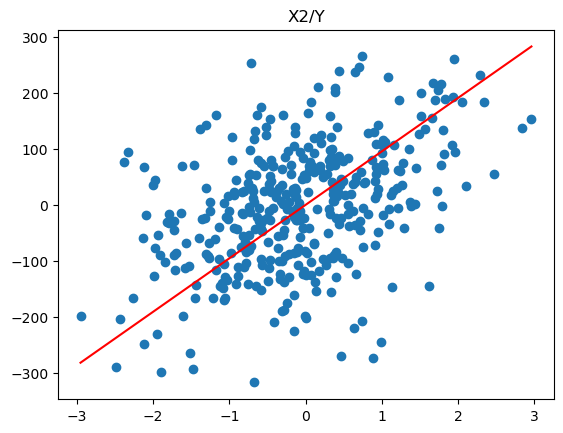

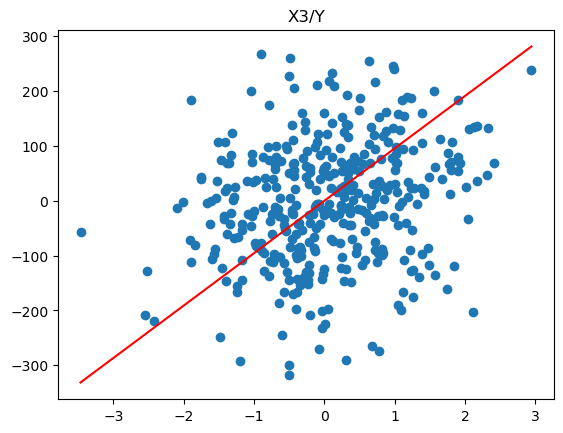

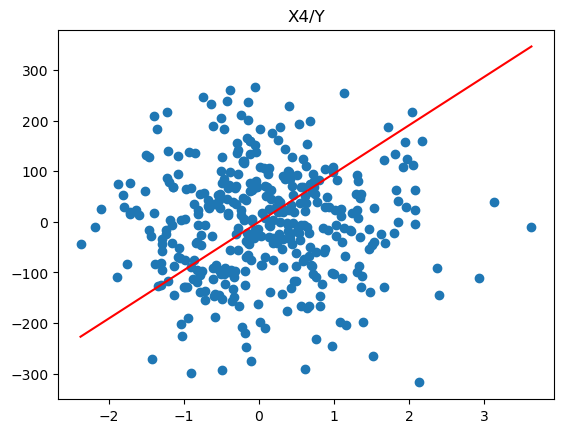

In [14]:
for i in x.columns:
    plt.scatter(x[i], y)
    xx = np.linspace(x[i].min(), x[i].max(), 100).reshape((-1, 1))
    plt.plot(xx, binary.predict(xx), c='r')
    plt.title(f'X{i}/Y')
    plt.show()

### 2. (*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [20]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5 * 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [23]:
for i in x.columns:
    hyp = Model()
    x.reshape(y.shape)
    steps, errors = hyp.fit(x, y)
    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()

AttributeError: 'DataFrame' object has no attribute 'reshape'

### 3. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

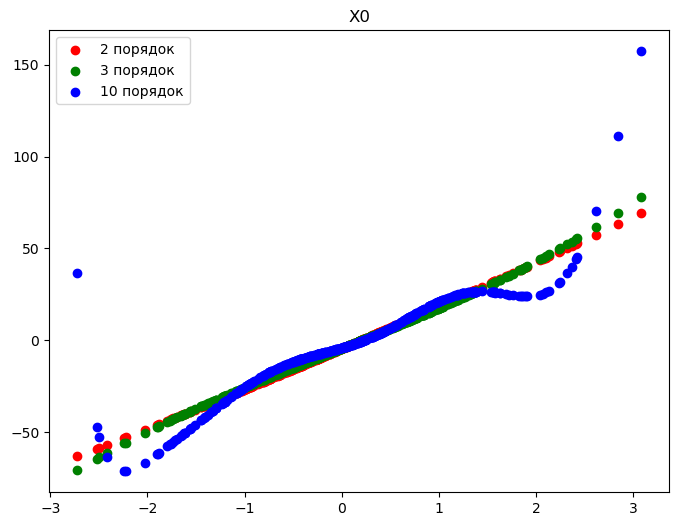

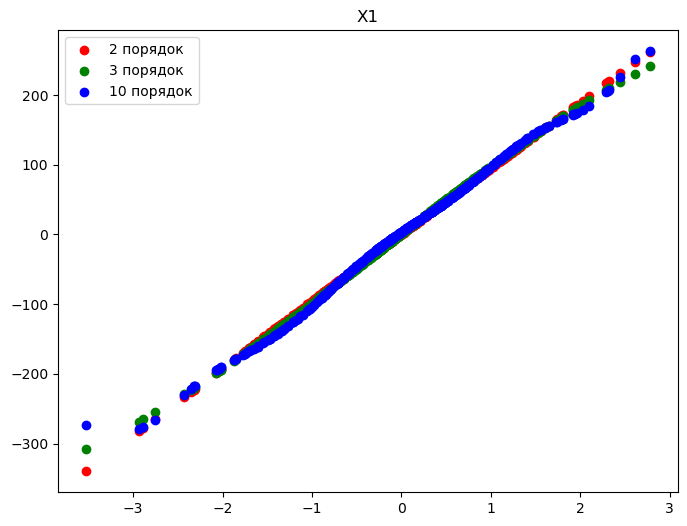

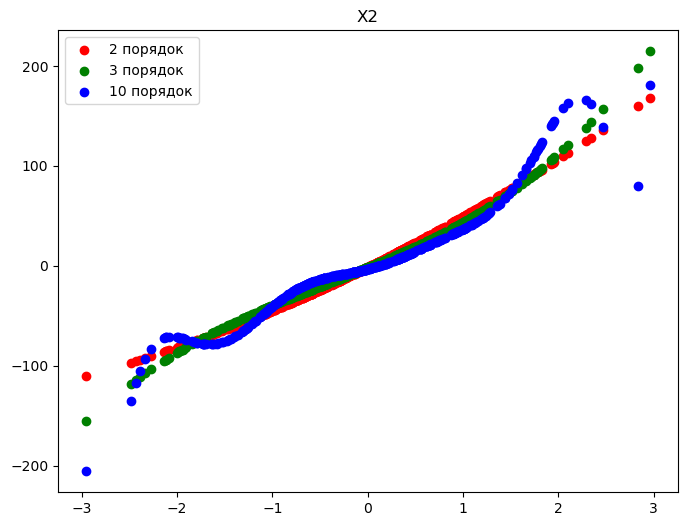

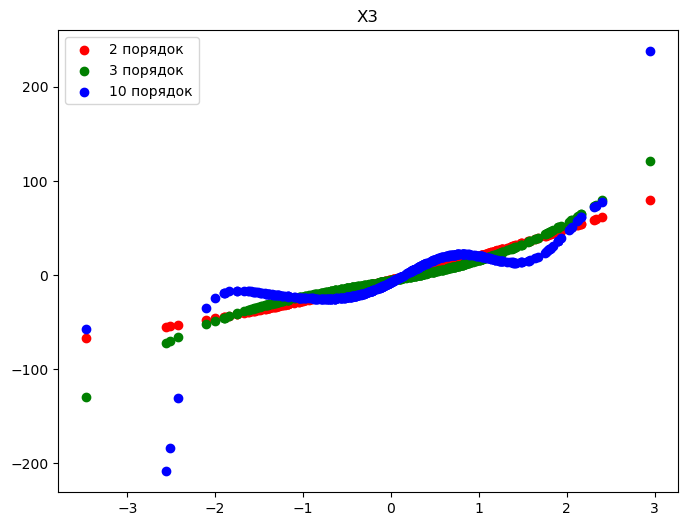

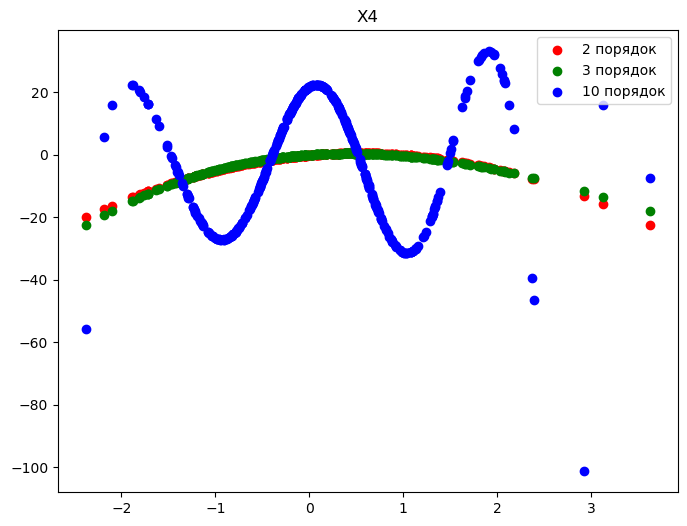

In [16]:
orders = [2, 3, 10]
colors = ['r', 'g', 'b']
for i in x.columns:
    plt.figure(figsize=(8, 6))
    for j, index in enumerate(orders):
        poly = make_pipeline(PolynomialFeatures(index),Ridge())
        poly.fit(x[[i]], y)
        yy = poly.predict(x[[i]])
        color = colors[j]
        plt.scatter(x[[i]], yy, color=color, label=f'{index} порядок')
    
    plt.title(f'X{i}')
    plt.legend()
    plt.show()

### 4. Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

### 5. Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

y_pred = Model.predict(x)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Median Absolute Error (MedAE):", medae)
print("R-squared (R2):", r2)


### 6. (*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.